# Practice Loading and Exploring Datasets

This assignment is purposely open-ended. You will be asked to load datasets from the [UC-Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). 

Even though you maybe using different datasets than your fellow classmates, try and be supportive and assist each other in the challenges that you are facing. You will only deepend your understanding of these topics as you work to assist one another. Many popular UCI datasets face similar data loading challenges.

Remember that the UCI datasets do not necessarily have a file type of `.csv` so it's important that you learn as much as you can about the dataset before you try and load it. See if you can look at the raw text of the file either locally or using the `!curl` shell command -or in some other way before you try and read it in as a dataframe. This will help you catch what would otherwise be unforseen problems.

Feel free to embellish this notebook with additional markdown cells,code cells, comments, graphs, etc. Whatever you think helps adequately address the questions.

## 1) Load a dataset from UCI (via its URL)

Please navigate to the home page and choose a dataset (other than the Adult dataset) from the "Most Popular" section on the right-hand side of the home page. Load the dataset via its URL and check the following (show your work):

- Are the headers showing up properly?
- Look at the first 5 and the last 5 rows, do they seem to be in order?
- Does the dataset have the correct number of rows and columns as described in the UCI page? 
 - Remember, that UCI does not count the y variable (column of values that we might want to predict via a machine learning model) as an "attribute" but rather as a "class attribute" so you may end up seeing a number of columns that is one greater than the number listed on the UCI website.
- Does UCI list this dataset as having missing values? Check for missing values and see if your analysis corroborates what UCI reports?
- if `NaN` values or other missing value indicators are not being detected by `df.isnull().sum()` find a way to replace whatever is indicating the missing values with `np.NaN`.
- Use the .describe() function in order to see the summary statistics of both the numeric and non-numeric columns. 

In [0]:
import pandas as pd
import requests
import numpy as np
import re

In [0]:
# Loading in Relative CPU Performance Data from the UCI Repository
cpu_performance_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/cpu-performance/machine.data', header=None)

In [0]:
# Checking the shape of the dataset to make sure it is the same as what is stated on the UCI Repository.
cpu_performance_df.shape
# Shape did not match because the first Row was being used as the header.
# To fix the header I used "pd.read_csv(url, header=None)" to get the dateset with the correct amount of Instances.

(209, 10)

In [0]:
print('First 5 Rows: \n',cpu_performance_df.head(),'\n\n') # Show first 5 rows of DataFrame
print('Last 5 Rows: \n',cpu_performance_df.tail()) # Show last 5 rows of DataFrame

First 5 Rows: 
          0        1    2     3      4    5   6    7    8    9
0  adviser    32/60  125   256   6000  256  16  128  198  199
1   amdahl   470v/7   29  8000  32000   32   8   32  269  253
2   amdahl  470v/7a   29  8000  32000   32   8   32  220  253
3   amdahl  470v/7b   29  8000  32000   32   8   32  172  253
4   amdahl  470v/7c   29  8000  16000   32   8   16  132  132 


Last 5 Rows: 
           0              1    2     3     4   5  6   7   8   9
204  sperry           80/8  124  1000  8000   0  1   8  42  37
205  sperry  90/80-model-3   98  1000  8000  32  2   8  46  50
206  sratus             32  125  2000  8000   0  2  14  52  41
207    wang         vs-100  480   512  8000  32  0   0  67  47
208    wang          vs-90  480  1000  4000   0  0   0  45  25


In [0]:
# So to fix the dataset I loaded the Attribute Info about the dataset from the UCI Repository to see if
# I could find the Attributes for the data set. 
names = requests.get('https://archive.ics.uci.edu/ml/machine-learning-databases/cpu-performance/machine.names')

In [0]:
# Useing the "df.columns" instance I gave all of my columns names useing the Attributes in the .name file from the UCI Repository
# 'https://archive.ics.uci.edu/ml/machine-learning-databases/cpu-performance/machine.names'
cpu_performance_df.columns = ['Vendor', 'Model', 'MCT/ns', 'MIN_MEM/kb', 'MAX_MEM/kb', 'CACHE_MEM\kb', 'CHANNEL_MIN', 'CHANNEL_MAX', 'Published_RP', 'Estimated_RP' ]
# Now printing the head of the DataFrame to make sure changes took place.
cpu_performance_df.head()

,Vendor,Model,MCT/ns,MIN_MEM/kb,MAX_MEM/kb,CACHE_MEM\kb,CHANNEL_MIN,CHANNEL_MAX,Published_RP,Estimated_RP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


In [0]:
# Now time to check if there are any missing values.
print('Check for Null values: \n\n',cpu_performance_df.isnull().sum(),'\n\n')
# After running this we can see that there are no null values in this DataFrame WOOHOO!!

In [0]:
# But lets look further:
# Using a for loop to check the values counts of each Column to see if any values look
# out of place.
for i in cpu_performance_df.columns:
  print('Attribute:',i,':Value Counts: \n')
  print(cpu_performance_df[i].value_counts(),'\n\n')
# After running this it appeared all values were accounted for.

In [0]:
# Using the "describe()" function, I will look at some more in depth info about the DataFrame
cpu_performance_df.describe()

In [0]:
# Using the "describe()" function with exclude='number' to see info about non-number values.
cpu_performance_df.describe(exclude='number')

,Vendor,Model
count,209,209
unique,30,209
top,ibm,4443
freq,32,1


## 2) Load a dataset from your local machine.
Choose a second dataset from the "Popular Datasets" listing on UCI, but this time download it to your local machine instead of reading it in via the URL. Upload the file to Google Colab using the files tab in the left-hand sidebar or by importing `files` from `google.colab` The following link will be a useful resource if you can't remember the syntax: <https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92>

- Answer all of the same bullet point questions from part 1 again on this new dataset. 


In [0]:
# Using google.colab._files to upload files from my local drive.
from google.colab import files
uploaded = files.upload()

Saving student.txt to student.txt
Saving student-mat.csv to student-mat.csv
Saving student-por.csv to student-por.csv


In [0]:
# Chicking to see if the uploaded files are in my current directory useing bash.
!pwd
!ls
# Create a new Directory named 'Student_Data' using bash.
!mkdir Student_Data/
# Move the desired Files to the new Directory using bash.
!mv student-mat.csv student-por.csv student.txt Student_Data/
# Moving to 'Student_Data' Directory
%cd Student_Data
# Checking for the files the were just moved.
!ls

/content/Student_Data
student-mat.csv  student-por.csv  student.txt
/content/Student_Data/Student_Data
student-mat.csv  student-por.csv  student.txt


In [0]:
################################################################################
# Openning the txt file assosiated with the Datasets to view additional        #
# info about them.                                                             #
# txt_file = open('student.txt','r')                                           #
# txt_string = txt_file.read().replace('"',' ')                                #
# print(txt_string)                                                            #
################################################################################
# # Closing the txt file after reading it.                                     #
# txt_file.close()                                                             # 
#                                                                              #
################################################################################
#            # Wrote this before I realized all I needed to do                 #  
#                    was use "pd.read_csv(file,sep=';')"                       # 
#                                                                              #   
# Since I've found a recent intrest in Regular Expressions, I decided to put it# 
# to use here to make a way to extract the Attributes for my Dataset.          #
# pattern = re.compile(r'\n\d{1,2}\s([a-zA-Z]*\d?)')                           #
# matches = pattern.findall(txt_string)                                        #
# match_list = []                                                              #
# for m in matches:                                                            #
#   match_list.append(m)                                                       #
# match_list                                                                   #     
################################################################################   

In [0]:
# Now to read in the csv files that are in 'Student_Data/'
math_df = pd.read_csv('student-mat.csv',sep=';') # using (sep=';'), because the 
por_df = pd.read_csv('student-por.csv',sep=';') # attrs and values were joined by ";".

# These Data Sets are of Student Performance amongst two subjects; math and portuguese
# I'm going to merge these datasets together for full view of student performance.

In [0]:
# Merging the 2 datasets together to make 1 dataframe
students_performance_df = pd.concat([math_df,por_df])

In [0]:
# Chacking the top 5 rows
students_performance_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [0]:
# Checking the last 5 rows
students_performance_df.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
644,MS,F,19,R,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6,10,10,10
648,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,4,10,11,11


In [0]:
# Checking for null values
students_performance_df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [0]:
# Checking each individual column for odd or missing values.
for a in students_performance_df.columns:
  print('\nAttribute:',a,':Value Counts: \n')
  print(students_performance_df[a].value_counts())


Attribute: school :Value Counts: 

GP    772
MS    272
Name: school, dtype: int64

Attribute: sex :Value Counts: 

F    591
M    453
Name: sex, dtype: int64

Attribute: age :Value Counts: 

16    281
17    277
18    222
15    194
19     56
20      9
21      3
22      2
Name: age, dtype: int64

Attribute: address :Value Counts: 

U    759
R    285
Name: address, dtype: int64

Attribute: famsize :Value Counts: 

GT3    738
LE3    306
Name: famsize, dtype: int64

Attribute: Pstatus :Value Counts: 

T    923
A    121
Name: Pstatus, dtype: int64

Attribute: Medu :Value Counts: 

4    306
2    289
3    238
1    202
0      9
Name: Medu, dtype: int64

Attribute: Fedu :Value Counts: 

2    324
1    256
3    231
4    224
0      9
Name: Fedu, dtype: int64

Attribute: Mjob :Value Counts: 

other       399
services    239
at_home     194
teacher     130
health       82
Name: Mjob, dtype: int64

Attribute: Fjob :Value Counts: 

other       584
services    292
teacher      65
at_home      62
health 

In [0]:
# Use describe() to display statistical info about our data.
students_performance_df.describe()

In [0]:
# Check to see a description of non-number values.
students_performance_df.describe(exclude='number')

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044,1044
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,no,yes,yes,yes,no
freq,772,591,759,738,923,399,584,430,728,925,640,824,528,835,955,827,673


## 3) Make Crosstabs of the Categorical Variables

Take whichever of the above datasets has more categorical variables and use crosstabs to tabulate the different instances of the categorical variables.


In [0]:
# Making a variable for my crosstabs
address_x_famsize = pd.crosstab(students_performance_df['address'],students_performance_df['famsize'],normalize=True,margins=True)
mothers_with_jobs_x_famsize = pd.crosstab(students_performance_df['Mjob'],students_performance_df['famsize'])
fathers_with_jobs_x_famsize = pd.crosstab(students_performance_df['Fjob'],students_performance_df['famsize'])

In [0]:
# Check to see that the variable assignment worked
# First I wanted to look at the corralation between The 'famsize' and if larger families lived in urban or rural areas.
address_x_famsize
# After running all I can see is:
#    - the out of all the students the family sizes are greater than three.
#    - More students live in Urban areas regardless of family size.

famsize,GT3,LE3,All
address,,,
R,0.204023,0.068966,0.272989
U,0.502874,0.224138,0.727011
All,0.706897,0.293103,1.000000


In [0]:
# Now lets see the correlation between students who have Mothers with jobs and the family size.
display(mothers_with_jobs_x_famsize)
# Now lets see the correlation between students who have Fathers with jobs and the family size.
display(fathers_with_jobs_x_famsize)

# It looks like more mothers stay home, teach, healthcare. Than fathers of the students.

## 4) Explore the distributions of the variables of the dataset using:
- Histograms
- Scatterplots
- Density Plots

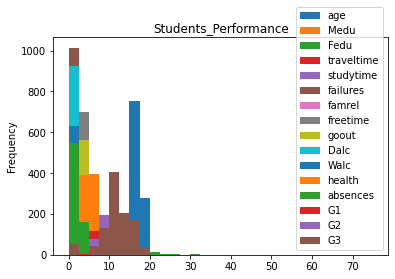

In [0]:
# Histogram
students_performance_df.plot(kind='hist',bins=30,title='Students_Performance');

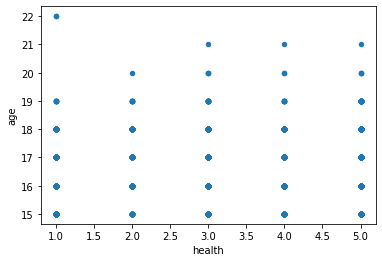

In [0]:
# Scatter Plot
students_performance_df.plot(kind='scatter',x='health',y='age')
# couldn't find anything helpful with the scatter plot after playing aroung with the data.

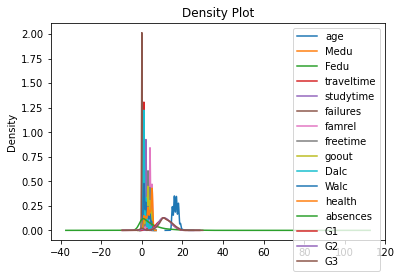

In [0]:
# Density Plot
students_performance_df.plot(kind='density',title='Density Plot');

## 5) Create at least one visualization from a crosstab:

Remember that a crosstab is just a dataframe and can be manipulated in the same way by row index, column, index, or column/row/cell position.


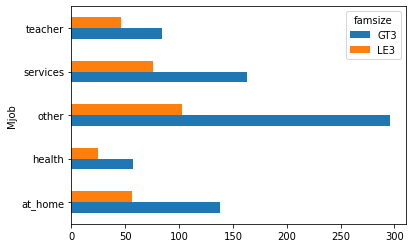

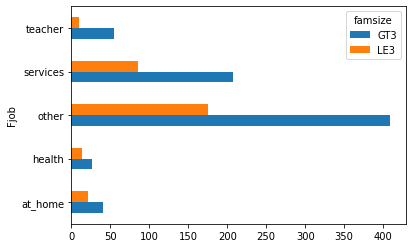

In [0]:
# I'll use horizontal bar graph to view my crosstab data.
mothers_with_jobs_x_famsize.plot(kind='barh');
fathers_with_jobs_x_famsize.plot(kind='barh');

## Stretch Goals 

The following additional study tasks are optional, they are intended to give you an opportunity to stretch yourself beyond the main requirements of the assignment. You can pick and choose from the below, you do not need to complete them in any particular order.

### - Practice Exploring other Datasets

### -  Try using the Seaborn plotting library's "Pairplot" functionality in order to explore all of the possible histograms and scatterplots of your dataset all at once:

[Seaborn Pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

### - Turn some of the continuous variables into categorical variables by binning the values using:
- [pd.cut()](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.cut.html)
- [pd.qcut()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)
- <https://stackoverflow.com/questions/30211923/what-is-the-difference-between-pandas-qcut-and-pandas-cut>

And then use crosstabs to compare/visualize these binned variables against the other variables.


### - Other types and sources of data
Not all data comes in a nice single file - for example, image classification involves handling lots of image files. You still will probably want labels for them, so you may have tabular data in addition to the image blobs - and the images may be reduced in resolution and even fit in a regular csv as a bunch of numbers.

If you're interested in natural language processing and analyzing text, that is another example where, while it can be put in a csv, you may end up loading much larger raw data and generating features that can then be thought of in a more standard tabular fashion.

Overall you will in the course of learning data science deal with loading data in a variety of ways. Another common way to get data is from a database - most modern applications are backed by one or more databases, which you can query to get data to analyze. We'll cover this more in our data engineering unit.

How does data get in the database? Most applications generate logs - text files with lots and lots of records of each use of the application. Databases are often populated based on these files, but in some situations you may directly analyze log files. The usual way to do this is with command line (Unix) tools - command lines are intimidating, so don't expect to learn them all at once, but depending on your interests it can be useful to practice.

One last major source of data is APIs: https://github.com/toddmotto/public-apis

API stands for Application Programming Interface, and while originally meant e.g. the way an application interfaced with the GUI or other aspects of an operating system, now it largely refers to online services that let you query and retrieve data. You can essentially think of most of them as "somebody else's database" - you have (usually limited) access.

*Stretch goal* - research one of the above extended forms of data/data loading. See if you can get a basic example working in a notebook. Image, text, or (public) APIs are probably more tractable - databases are interesting, but there aren't many publicly accessible and they require a great deal of setup.

In [0]:
# Since I'm interested in music, I found that there is a lyric webpage called
# "genius.com" has an api and there is a pythong package for it.

# Ultimatly my reason for doing the api part of the stretch is because im very interested
# in NLP so i feel parsing through a web pages API is a smart thing to get a jump start on.

# Using Bash to install lyricsgenius library
! pip install lyricsgenius

In [0]:
# Importing lyricsgenius lib to access genius.com api
import lyricsgenius as genius

In [0]:
api = genius.Genius('RvviKOCQI9YdRK5E0iUnRGj3gVEUofXh_dhR6uUtNBJcaWmELZphUeGPdiAiZg71')

In [0]:
artist_eminem_top_10 = api.search_artist('eminem', max_songs=10, sort='popularity')

Searching for songs by eminem...

Changing artist name to 'Eminem'
Song 1: "Rap God"
Song 2: "Killshot"
Song 3: "Lose Yourself"
Song 4: "The Monster"
Song 5: "Godzilla"
Song 6: "Lucky You"
Song 7: "The Ringer"
Song 8: "River"
Song 9: "Venom"
Song 10: "Berzerk"

Reached user-specified song limit (10).
Done. Found 10 songs.


In [0]:
test_var = api.get_annotation(id_=10225840)

In [0]:
# Playing around with the api seeing what it generates
annotation_dict = test_var['annotation']
referent_dict = test_var['referent']

In [0]:
# Seeing the key names in this test dictionary from the api
for i in annotation_dict.keys():
  print(i)

api_path
body
comment_count
community
custom_preview
has_voters
id
pinned
share_url
source
state
url
verified
votes_total
current_user_metadata
authors
cosigned_by
rejection_comment
verified_by


In [0]:
for a in referent_dict.keys():
  print(a)

_type
annotator_id
annotator_login
api_path
classification
featured
fragment
id
is_description
path
range
song_id
url
verified_annotator_ids
annotatable


In [0]:
# The url where the exanple is being pulled from.
referent_dict['url']

'https://genius.com/10225839/www.example.com'

In [0]:
referent_dict['verified_annotator_ids']

[188555]

In [0]:
# Now to play with seaborn
import seaborn as sb

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# Looking at all the practice datasets in seaborn
sb.get_dataset_names()

/usr/local/lib/python3.6/dist-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /usr/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


['anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'iris',
 'mpg',
 'planets',
 'tips',
 'titanic']

In [0]:
# I chose to load in the titanic dataset from seaborn
sb_titanic = sb.load_dataset('titanic') 

In [0]:
# looking at the head of the dataset
sb_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [0]:
# turning this dataset from seaborn into a pandas dataframe.
titanic_df = pd.DataFrame(sb_titanic)

In [0]:
# Confirming that it worked.
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


TypeError: ignored

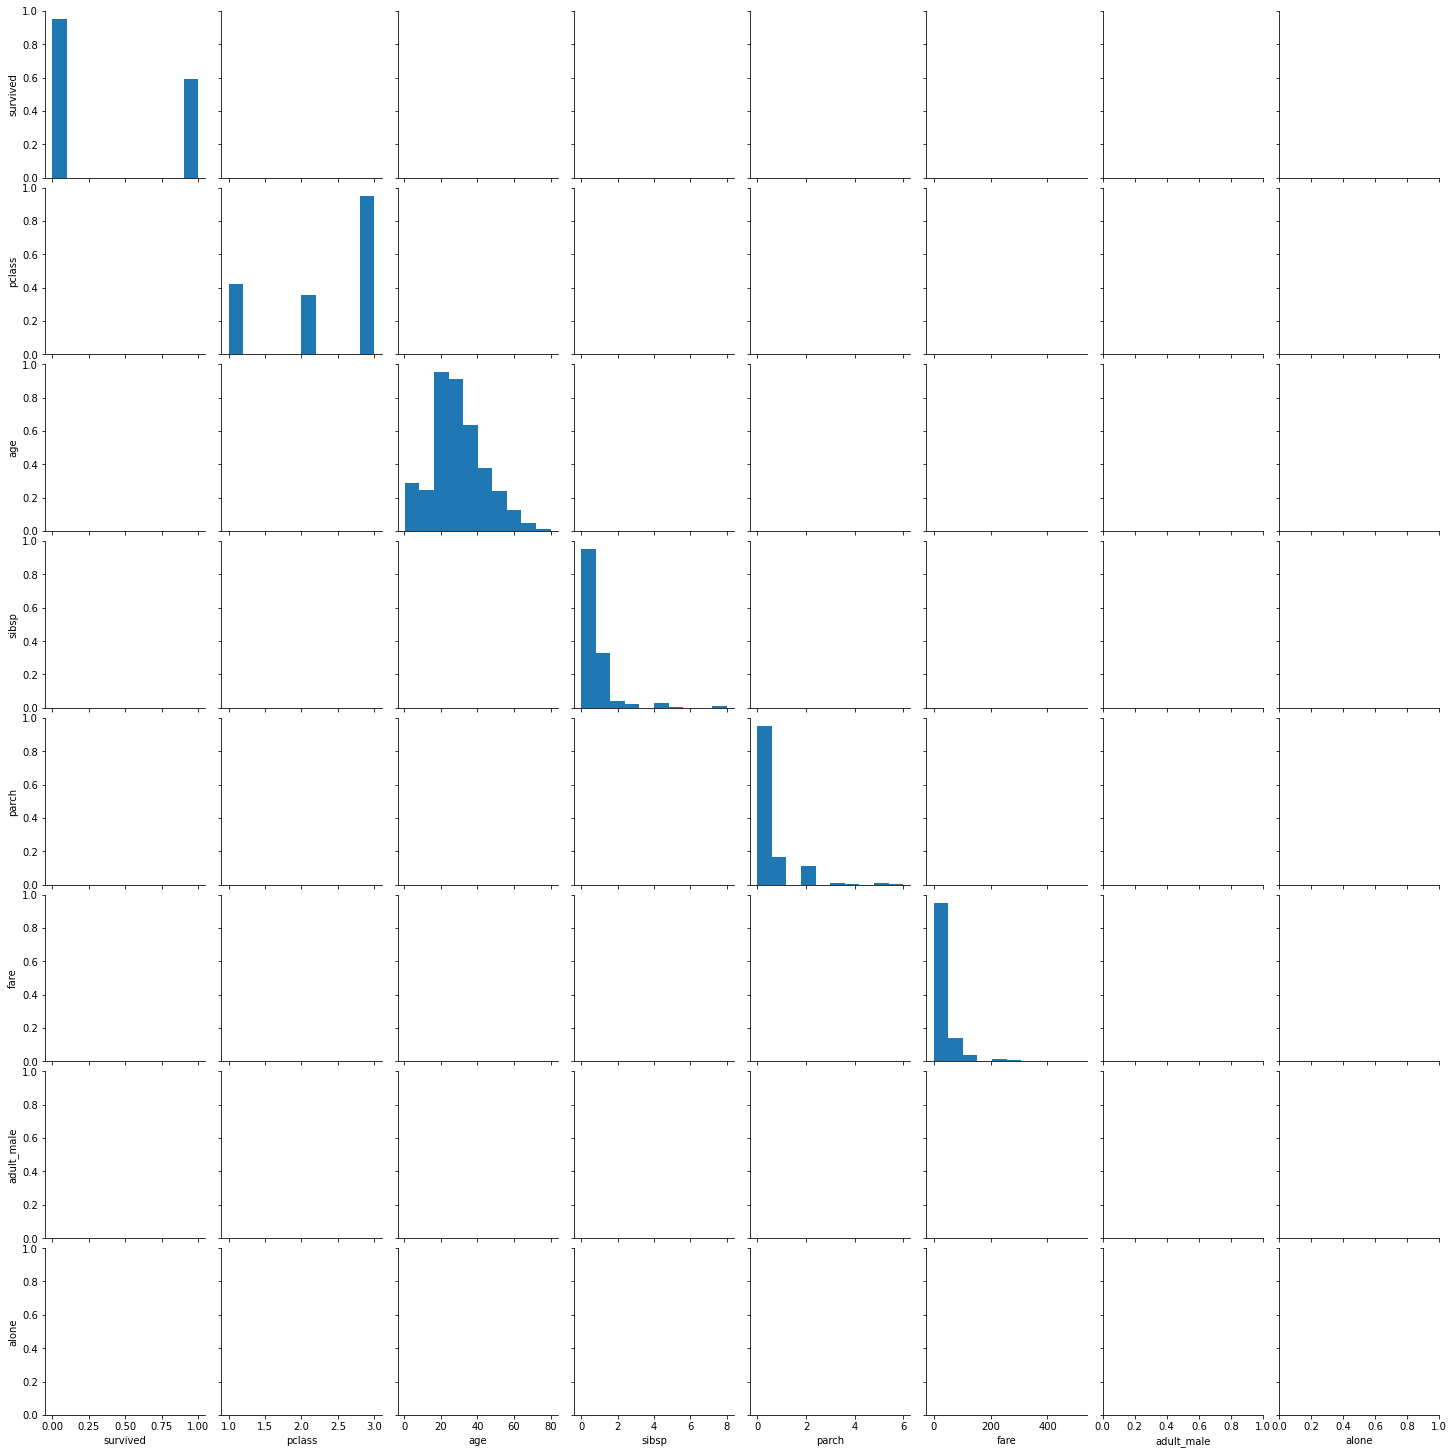

In [0]:
# Now time to try pair plot.
sb.pairplot(titanic_df);